## PDF Results Parsing

# Takes Utah Division of Wildlife Personal Info PDF and converts it to CSV

Default open page

In [10]:
# open/load pdf file
import pdfplumber

pdf = pdfplumber.open('2023_results_v2.pdf')

p0 = pdf.pages[0]

im = p0.to_image()
im

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1081, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "c:\Users\Jonathan\AppData\Local\Programs\Python\Python37\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2023, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "c:\Users\Jonathan\AppData\Local\Programs\Python\Python37\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2059, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

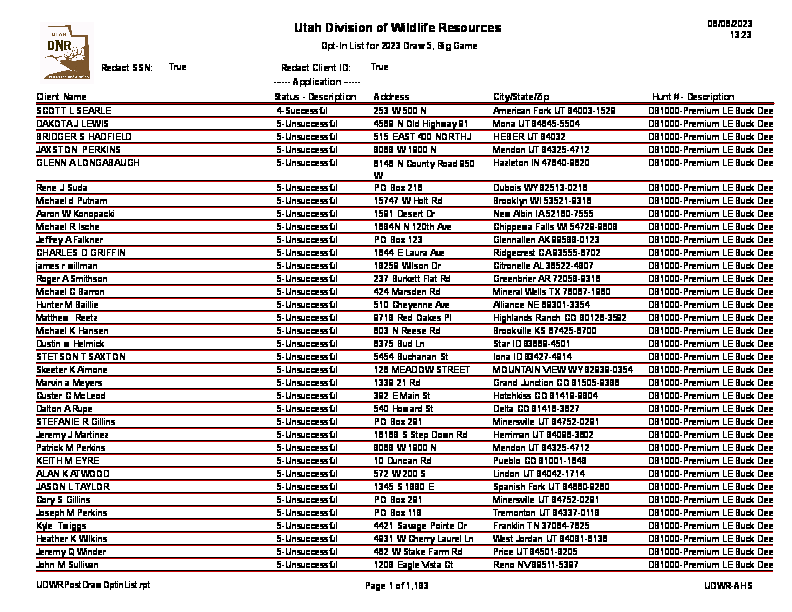

In [ ]:
# check default table settings
im.reset().debug_tablefinder()

Since we have horiziontal lines w/ pdf and we're missing vertical lines, we explicitly pick vertical lines that work for the pages. Use debug tablefinder to visualize and see what we're doing

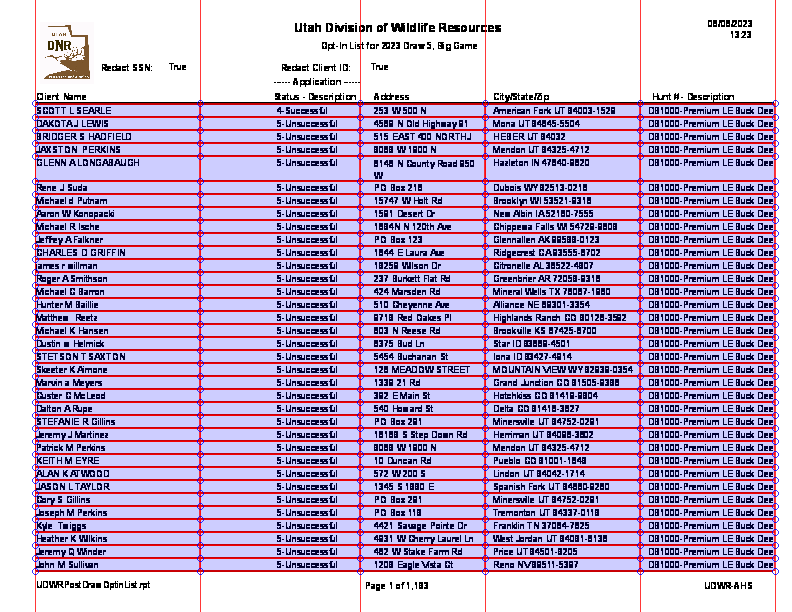

In [ ]:
# table debug
table_settings = {
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [35, 200, 360, 485, 640, 775]
}

im.reset().debug_tablefinder(table_settings)

## Test Extraction of the first page using table settings

In [ ]:
p0.extract_table(table_settings)

[['SCOTT L SEARLE',
  '4-Successful',
  '253 W 500 N',
  'American Fork UT 84003-1529',
  'DB1000-Premium LE Buck Dee'],
 ['DAKOTA J LEWIS',
  '5-Unsuccessful',
  '4569 N Old Highway 91',
  'Mona UT 84645-5504',
  'DB1000-Premium LE Buck Dee'],
 ['BRIDGER S HADFIELD',
  '5-Unsuccessful',
  '515 EAST 400 NORTHJ',
  'HEBER UT 84032',
  'DB1000-Premium LE Buck Dee'],
 ['JAXSTON  PERKINS',
  '5-Unsuccessful',
  '8068 W 1900 N',
  'Mendon UT 84325-4712',
  'DB1000-Premium LE Buck Dee'],
 ['GLENN A LONGABAUGH',
  '5-Unsuccessful',
  '6146 N County Road 950 \nW',
  'Hazleton IN 47640-9620',
  'DB1000-Premium LE Buck Dee'],
 ['Rene J Suda',
  '5-Unsuccessful',
  'PO Box 216',
  'Dubois WY 82513-0216',
  'DB1000-Premium LE Buck Dee'],
 ['Michael d Putnam',
  '5-Unsuccessful',
  '15747 W Holt Rd',
  'Brooklyn WI 53521-9316',
  'DB1000-Premium LE Buck Dee'],
 ['Aaron W Konopacki',
  '5-Unsuccessful',
  '1591 Desert Dr',
  'New Albin IA 52160-7555',
  'DB1000-Premium LE Buck Dee'],
 ['Michael R Is

## Create table using pdf data

Table is used later to write to csv, see output to determine structure

In [11]:
table = []
with pdfplumber.open('2023_results_v2.pdf') as pdf:
    for page in pdf.pages:
        try:
            table += page.extract_table(table_settings)
        except:
            pass
table

[['SCOTT L SEARLE',
  '4-Successful',
  '253 W 500 N',
  'American Fork UT 84003-1529',
  'DB1000-Premium LE Buck Dee'],
 ['DAKOTA J LEWIS',
  '5-Unsuccessful',
  '4569 N Old Highway 91',
  'Mona UT 84645-5504',
  'DB1000-Premium LE Buck Dee'],
 ['BRIDGER S HADFIELD',
  '5-Unsuccessful',
  '515 EAST 400 NORTHJ',
  'HEBER UT 84032',
  'DB1000-Premium LE Buck Dee'],
 ['JAXSTON  PERKINS',
  '5-Unsuccessful',
  '8068 W 1900 N',
  'Mendon UT 84325-4712',
  'DB1000-Premium LE Buck Dee'],
 ['GLENN A LONGABAUGH',
  '5-Unsuccessful',
  '6146 N County Road 950 \nW',
  'Hazleton IN 47640-9620',
  'DB1000-Premium LE Buck Dee'],
 ['Rene J Suda',
  '5-Unsuccessful',
  'PO Box 216',
  'Dubois WY 82513-0216',
  'DB1000-Premium LE Buck Dee'],
 ['Michael d Putnam',
  '5-Unsuccessful',
  '15747 W Holt Rd',
  'Brooklyn WI 53521-9316',
  'DB1000-Premium LE Buck Dee'],
 ['Aaron W Konopacki',
  '5-Unsuccessful',
  '1591 Desert Dr',
  'New Albin IA 52160-7555',
  'DB1000-Premium LE Buck Dee'],
 ['Michael R Is

### Regex is weird, do a little test

In [ ]:
# regex debugging
import re

re.split(r"( UT )", "Salt Lake City UT 84103-1234")

['Salt Lake City', ' UT ', '84103-1234']

In [12]:
import re

# function to parse City, State, Zip -> returns tuple

pattern = r' (A[LKSZRAEP]|C[AOT]|D[EC]|F[LM]|G[AU]|HI|I[ADLN]|K[SY]|LA|M[ADEHINOPST]|N[CDEHJMVY]|O[HKR]|P[ARW]|RI|S[CD]|T[NX]|UT|V[AIT]|W[AIVY]) '

def parseCityState(full_address):
    return re.split(pattern, full_address)

In [13]:
# Name, Status, Address, City/State/Zip, Hunt Info

f = open('results.csv', 'w')

# write headers
f.write('name, status, address, city, state, zip, hunt\n')

for row in table:
    row[2] = row[2].replace('\n', '')
    row[3] = row[3].replace('\n', '')
    temp_row_3 = parseCityState(row[3])
    real_row_3 = ', '.join(temp_row_3)
    f.write(f'{row[0]}, {row[1]}, {row[2]}, {real_row_3}, {row[4]}\n')
    # f.write(f'{row[0]}, {row[1]}, {row[2]}, {real_row_3}, {row[4]}\n')
f.close()
f

<_io.TextIOWrapper name='results.csv' mode='w' encoding='cp1252'>